In [ ]:
"""

examine distribution of target: 2019 Median Household Income
and determine appropriate transformation to fit normal distribution

"""

In [1]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
with open('county_model_data.pickle', 'rb') as read_file:
    model_data = pickle.load(read_file)
    
model_data.head()

,FIPS_code,Stabr,area_name,Area_Name,Median_Household_Income_2019,Civilian_labor_force_2019,Unemployment_rate_2019,hwy_count,city_town_counts,Metro_2013,...,Farming_2015_Update,Mining_2015-Update,Manufacturing_2015_Update,Government_2015_Update,Recreation_2015_Update,Nonspecialized_2015_Update,Low_Education_2015_Update,Low_Employment_Cnty_2008_2012_25_64,Retirement_Dest_2015_Update,Persistent_Poverty_2013
0,01001,AL,"Autauga County, AL",Autauga County,58233.0,26172.0,2.7,6.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,01003,AL,"Baldwin County, AL",Baldwin County,59871.0,97328.0,2.7,12.0,14.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,01005,AL,"Barbour County, AL",Barbour County,35972.0,8537.0,3.8,11.0,6.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,01007,AL,"Bibb County, AL",Bibb County,47918.0,8685.0,3.1,8.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,01009,AL,"Blount County, AL",Blount County,52902.0,25331.0,2.7,9.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


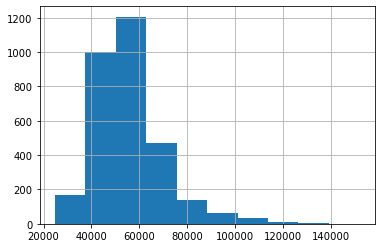

In [3]:
# target 
model_data['Median_Household_Income_2019'].hist();

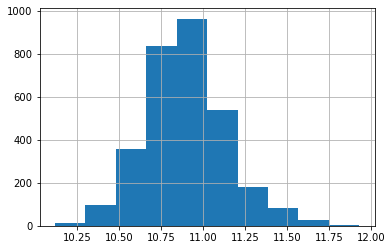

In [4]:
# try log transformation
np.log(model_data['Median_Household_Income_2019']).hist();

In [5]:
## try boxcox transform and find best lambda

import scipy.stats as stats
stats.boxcox(model_data['Median_Household_Income_2019'])

# Returns a dataset transformed by a Box-Cox power transformation.
# If lmbda is None, this will find the lambda that maximizes the log-likelihood function 
#     and return it as the second output argument.


(array([2.15393198, 2.15410657, 2.15051503, ..., 2.155112  , 2.15357976,
        2.15405815]),
 -0.46132638607980164)

In [ ]:
# the lambda is close to -0.5
# lambda = -0.5   means  Y^-0.5 = 1/(Sqrt(Y))

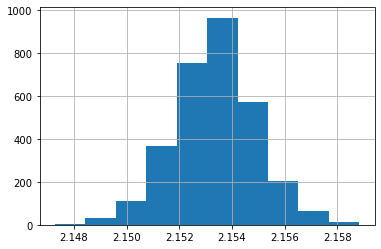

In [16]:
pd.Series(stats.boxcox(model_data['Median_Household_Income_2019'])[0]).hist();

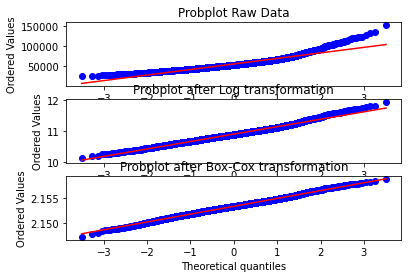

In [17]:
# plot original target, log-transform, and 1/(Sqrt(Y)) transform

fig = plt.figure()

ax1 = fig.add_subplot(311)
x = model_data['Median_Household_Income_2019']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot Raw Data')

ax2 = fig.add_subplot(312)
xL = np.log(model_data['Median_Household_Income_2019'])
prob = stats.probplot(xL, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Log transformation')

ax3 = fig.add_subplot(313)
xt, _ = stats.boxcox(model_data['Median_Household_Income_2019'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax3)
ax3.set_title('Probplot after Box-Cox transformation')

plt.show()

